1) 기술통계 , 회귀분석 상관분석 작섭
2) 히스토그램 , 파이차트, 산점도 , 히트맵

와인 품질 등급 예측 .
와인 속성 분석 품질 등급예측 
정보확인 : info 함수이용 예정 
describe() : 기본 평균, 분산, 편차, 최소,최대등 통계관련 데이터 간단히 요약
unique() :중복제거
value_counts(): 해당 데이터의 갯수를 집계

데이터 모델링 
1. 데이터 두 그룹으로 비교분석
2. t-검정 , 두그룹을 비교하는 분석, 라이브러리를 이용할 예정 scipy 패키지의 ttest_ind()
3. 회귀분석 라이브러리 statsmodels.fomula.api ,ols()

등급을 예측 
샘플을 독립 변수 (x) -> 회귀분석 모델 적용 -> 종속 변수 ,  
양의 상관 , 음의상관관계 
품질에대해 값이 증가하면 품질의 등급이 올라가고 , 품질의등급이 내려가는 


용어정리 : 

기술통계 : 데이터 특성을 나타내는 수치를 이용해 분석을하는 기본적인통계방법
요약통계라고도 하고, 통계값으로 평균, 중앙값 , 최빈값(가장빈번하게 나타나는값)
대표적으로 표준편차라던지 사분위값 ( 상위,하위 ~퍼센트 4분할로 나누는 )

회귀분석 : 독립변수 x, 종속변수 y간 서로간의 연관성을 파악하기 위한 분석기법
입력값에 따라 결과값이 달라지는. 
하나의 변수가 다른변수에 어떠한 영향을 주는지, 인과관계를 분석시 많이 사용한다 

선형회귀 ( 직선 이용 )
수식예안 => y = b1+b2x+b3x + ... + bnx 

t-검정 : 데이터에서 찾은 평균으로 두 그룹에 차이가 있는지 확인하는 방법 
예) 레드와인, 화이트와인의 1등급,2등급인지 유무에 따라 가격의 차이가 있는지 확인할때 사용 


파일정리가 필요함 .
초기데이터 세미콜론으로 구분이되어있어서 csv 파일로 변경해보기 

In [7]:
# 파일정리가 필요함 .
# 초기데이터 세미콜론으로 구분이되어있어서 csv 파일로 변경해보기 
# !pip3 install pandas
# cmd 터미널 설치시 -> pip3 install pandas 
import pandas as pd

# 레드와인 csv파일로 읽어서 메모리 이동 , 다시 csv파일로 변경
red_df = pd.read_csv("/Users/u020/BigDataTest/My_Python/1-통계분석/winequality-red.csv", sep=";", header=0, engine='python')
# engin='python' 
red_df.to_csv("/Users/u020/BigDataTest/My_Python/1-통계분석/winequality-red2.csv", index=False)

              #csv 파일 형식으로 옮기기 

In [8]:
# 화이트와인을 csv 파일로 읽어서 -> 메모리 이동 -> csv 파일로 변경하기. 
white_df = pd.read_csv("/Users/u020/BigDataTest/My_Python/1-통계분석/winequality-white.csv",
sep=";", header = 0, engine = 'python')

# csv 파일 형식으로 옮기기 
red_df.to_csv("/Users/u020/BigDataTest/My_Python/1-통계분석/winequality-white2.csv",
index=False)

# 이미 머신러닝 연구소에 데이터를 관리를 하다보니, 미리 전처리가 되어 있음.
# 작업 중에 간혹, 널 값이라든지, 값이 크다든지 이상치, 이런 부분은 나중에 
# 파이썬의 함수를 이용해서, 값 변경하는 부분 보여 줄 예정. 

# 데이터 구조 보기.

fixed acidity, (고정산)
volatile acidity,(휘발산)
citric acid,(구연산)
residual sugar,(잔당)
chlorides,(염화물)
free sulfur dioxide,(유리 이산화황)
total sulfur dioxide,(총 이산화황)
density,(밀도)
pH,
sulphates,(황산염)
alcohol,(알코올)
위에 변수 :
독립 변수
======================
종속변수
quality, (품질)
=========================
데이터 전처리가 다 되어 있고, 
나열 할 때, 
독립 변수 순서  다음으로 종속 변수를 마지막에 표기한다. 

In [9]:
# 레드 와인, 화이트 와인의 샘플 데이터
# head() 상위 5개씩 추출해서 출력해보기. 
# 레드 와인, 
red_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# 화이트 와인, 
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
# 데이터 병합하기. 
# 레드 와인, 화이트 와인 합치기
# 레드 와인 csv 파일에 , 컬럼을 추가하기. 
# type 이라고, red , white 인지 분류를 위해서. 
# insert 특정 열 추가. 
red_df.insert(0, column="type", value="red")
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [75]:
# 이미 추가해서, 또 실행하면 또 추가하니, 일단 주석. 
# white_df.insert(0, column="type", value="white")
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [35]:
# 이미 추가해서, 또 실행하면 또 추가하니, 일단 주석. 
# white_df.insert(0, column="type", value="white")
white_df.head()
# 각 행 열의 구조 
white_df.shape

(4898, 13)

In [36]:
# 레드 , 화이트 와인 타입 열 추가 후 병합(합치기)  2개의 데이터프레임을 위아래로(수직으로) 합치는 방식
wine = pd.concat([red_df,white_df])

In [37]:
# 결과 조회 
wine.shape

(6497, 13)

In [20]:
wine.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,red,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,red,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,red,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,red,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [38]:
# red, white 합친 메모리의 내용을 -> csv 파일로 쓰기. 
# csv 파일 형식으로 옮기기 
wine.to_csv("/Users/u020/BigDataTest/My_Python/1-통계분석/wine2.csv",
index=False)

In [39]:
# 합쳐진 데이터를 가지고 , 기본 통계 분석하기, 파이썬의 라이브러리 활용해보기. 
# 기본 정보 
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


In [40]:
# wine csv 파일의 헤더 ( 컬럼이름의 공백을 언더바로 교체작업 )
wine.columns=wine.columns.str.replace(" ","_")

In [41]:
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
# wine csv 의 간단한 설명 : 요약 통계 , 
# 신기함 
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [26]:
# wine csv의 해당 값의 카운트
# 등급별 개수들 quality(종속변수).value_counts 함수로 간단히 통계값확인 
wine.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [43]:
# wine의 품질의 유니크 함수 이용해서 unique() 중복제거를 할거고
# sorted 함수이용해서정렬 
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [44]:
# 준비된 내용으로 모델링을 할거임
# describe() 함수 이용해서 그룹 비교해보기 
# 레드 화이트 두그룹으로 나눠서 비교해보기 
wine.groupby("type")["quality"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [33]:
# 
wine.groupby("type")["quality"].mean()

type
red    5.636023
Name: quality, dtype: float64

In [45]:
# 이 코드는 wine 데이터프레임을 'type' 열을 기준으로 그룹화한 뒤, 'quality' 열에 대해 평균(mean), 표준편차(std), 최솟값(min), 최댓값(max)을 계산
wine.groupby("type")["quality"].agg(["mean","std","min","max"])

,mean,std,min,max
type,,,,
red,5.636023,0.807569,3,8
white,5.877909,0.885639,3,9


In [57]:
# 기술 통계 = 요약 통계, 통계 값들을 가지고, 기본적인 분석 
# t-검정, 회귀분석 , -> 파이썬에 제공하는 함수를 이용할 예정. 
# t-검정 그룹 간의 차이를 확인 할 예정 -> scipy 패키지 이용 예정. 
# 회귀분석 -> statsmodels 라이브러리 사용할 예정. 

from scipy import stats
from statsmodels.formula.api import ols,glm 

red_wine_quality = wine.loc[wine['type'] == "red", "quality"] 
# red_wine_quality
white_wine_quality = wine.loc[wine['type'] == "white", "quality"] 

# t-검정 분석 하기. 
stats.ttest_ind(red_wine_quality,white_wine_quality, equal_var= False)

# 독립 변수와, 종속 변수의 , 나열 coef
Rformula = "quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol"

# 위에서 정의한, 종속 변수(quality), 나머지 변수 독립 변수를 정리 
# 회귀 분석 함수 수행. 
regression_result = ols(Rformula, data = wine).fit()

# 회귀 분석 요약을 출력. 
regression_result.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:33:52   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# 만든 회귀 분석 모델을 활용해서 예측해보기 "quality","type" 열 제외 
sample1=wine[wine.columns.difference(["quality","type"])]
# sample1.shape
# sample1
# wine

# 마지막 5는 포함안댐 [:] 전체 컬럼 상위다섯개만 
sample1_2=sample1[0:5][:]
# sample1_2
# 예측값 
# 지도 학습 = 답이 있는 평가 분석방법 
sample1_predict=regression_result.predict(sample1_2)
print(f"sample1_predict: 앞에만든 회귀분석모델을 이용해서 quality 예측 값 \n: {sample1_predict}")
# print(f"회귀분석을 하기전에 quality 값 확인 \n: {wine.head()}")
print(f"회귀분석을 하기전에 quality 값 확인 \n: {wine[0:5]["quality"]}")

sample1_predict: 앞에만든 회귀분석모델을 이용해서 quality 예측 값 
: 0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64
회귀분석을 하기전에 quality 값 확인 
: 0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


In [87]:
# 자료의 있는 값이 아니라. 
# 임의로 우리가 독립 변수의 값을 설정해서, 모델을 이용해, 품질의 결과값 예측 해보기. 
# Rformula = "quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol"

# 임의의 data 만들기, 독립 변수에 예시 값 넣어보고, 모델로 예측 다시 해보기. 
data = {"fixed_acidity":[8.2, 8], "volatile_acidity":[0.7,0.5],"citric_acid" : [0.2,0.3],
"residual_sugar":[6.0,5.7], "chlorides" : [0.045,0.040], "free_sulfur_dioxide" : [29.0,30.0], "total_sulfur_dioxide":[97.0,98.0],
"density" : [0.955, 0.92], "pH" :[3.12,3.01], "sulphates": [0.3,0.25], "alcohol":[8.9,8.8] }

# 딕션너리 -> pd 이용해서 표로 만들기(DataFrame=DF)
sample2 = pd.DataFrame(data, columns=sample1.columns)
sample2


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,8.9,0.045,0.2,0.955,8.2,29.0,3.12,6.0,0.30,97.0,0.7
1,8.8,0.040,0.3,0.920,8.0,30.0,3.01,5.7,0.25,98.0,0.5


In [88]:
# 임의의 수치로 만든 data를 회귀모델에 인자값으로 넣어서, 결괏값 예측해보기. 
sample2_predict = regression_result.predict(sample2)
sample2_predict

0    7.022545
1    9.066865
dtype: float64

/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_33590/3853516398.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_wine_quality, kde=True, color="red", label =" red wine")
/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_33590/3853516398.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

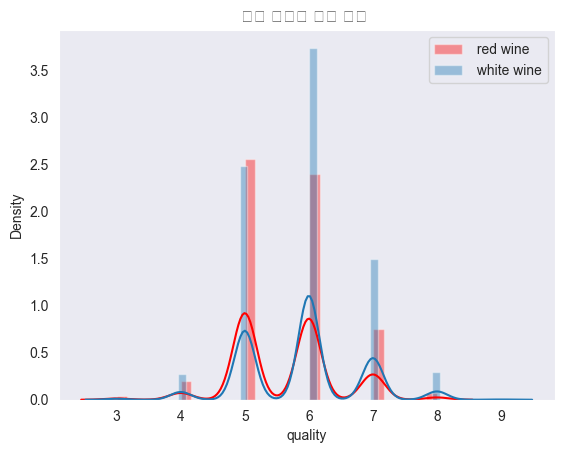

In [89]:
# 시각화에 필요한 패키지 임포트 하기. 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style("dark")
# red wine 속성 설정. 
sns.distplot(red_wine_quality, kde=True, color="red", label =" red wine")

# white wine 속성 설정. 
sns.distplot(white_wine_quality, kde=True, label =" white wine")

plt.title("와인 타입에 따른 품질 ")
plt.legend()
plt.show()

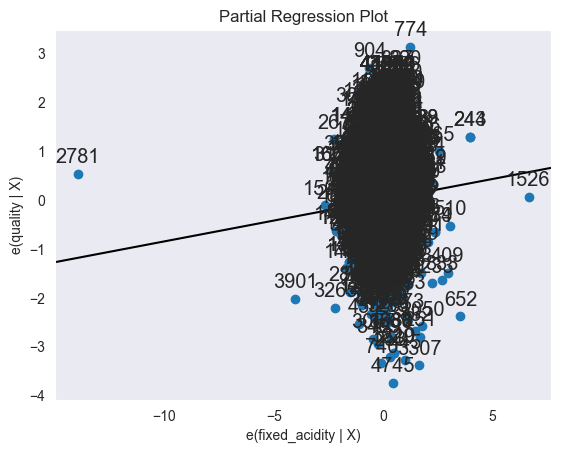

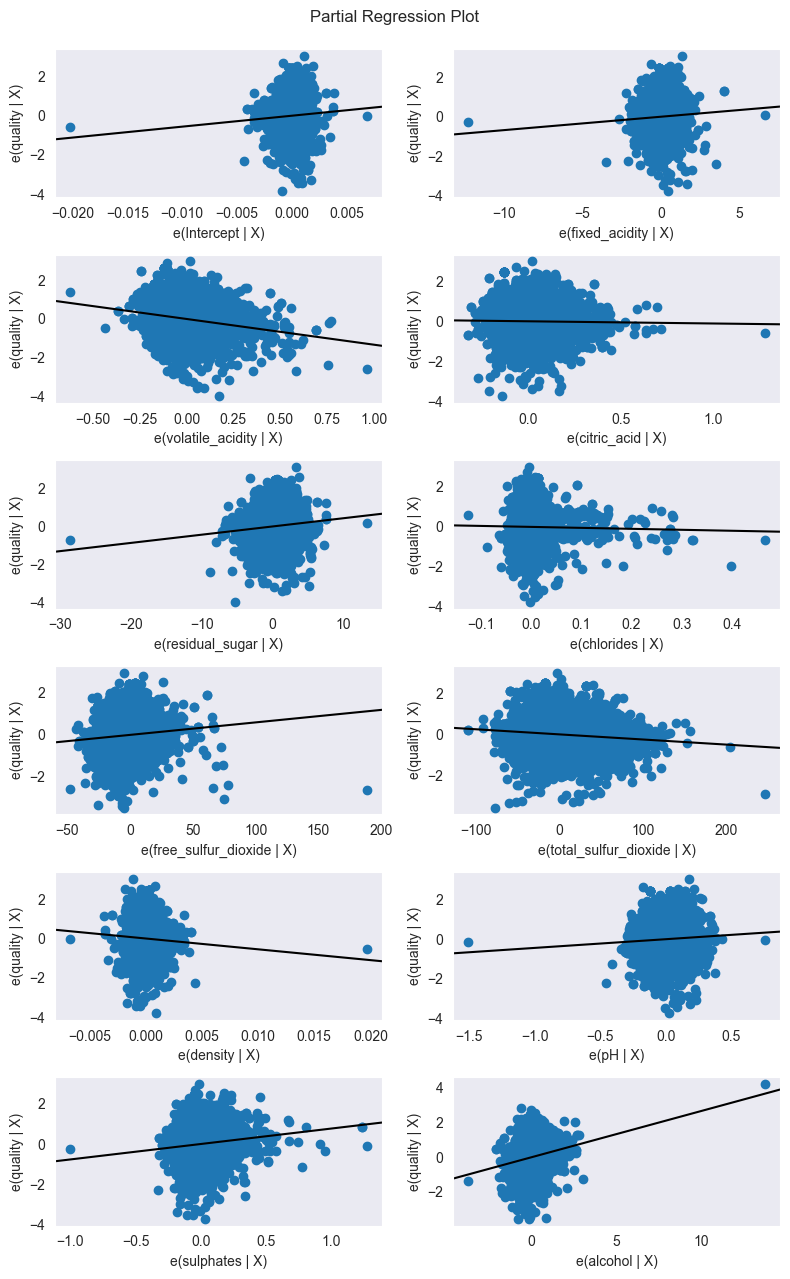

In [86]:
# 실제로 궁금했던 부분이, 어느 독립요소가, 실제 quality에 종속변수에 영향이 있는지 여부가 궁금했음. 
# 표에 답은 다 나와있었음 , 상관계수의 값으로 표기가 되었지만, 
# 시각화를 하는 이유가, 인사이트 결과를 좀더 쉽고 알아보기 편하게 하는게 주 목적. 

import statsmodels.api as sm 
# wine 컬럼들에서, 종속변수 quality, 독립변수 중 하나인 fixed_acidity , 빼고 , 나머지를 필터 
others = list(set(wine.columns).difference(set(["quality","fixed_acidity"])))

sm.graphics.plot_partregress("quality", "fixed_acidity", others, data=wine, ret_coords =True)
plt.show()
fig = plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()

# 기울기가 완만한지 아닌지로 
# 알코올 수치가 올라가면 올라갈수록 퀄리티가 높아지는것처럼 
# 0에 많이 분포되어있음 . 



결론 : 
테이터수집: 데이터 전처릳가 다되어있다 
독립변수 x1 , x2 ,x3  ... xn y(종속변수) ,이컬럼의 순서대로 데이터의 전처리가 되어있음 
데이터 정리 cleaning null 이상치 , 결측지 등 값의 유무 

데이터 분석 : t-검정 ,선형 회귀 (파이썬의 함수를 이용해서), 답이있는 내용을가지고 
모델을 학습을 하고 예측함 

데이터 시각화 : 히스토그램, 산점도등으로 시각화햇음
시각화를 통해서 : 얻고 싶은 결과가 무엇인지 - 와인의 품질은 알코올의 영향을 많이 받는다 
정량적으로 분석, 도출

상관분석, 기술통계, 요약통계 , 가장기본적인 분석의 뼈대
